In [6]:
import os
import numpy as np
import nibabel as nib
from skimage import io
from tqdm import tqdm

In [1]:
# Set the directory paths
data_dir = '/path/to/Dataset/'output_dir = '/path/to/save/2D/patches/'
# Set the patch size
patch_size = 128

# Set the minimum patch intensity threshold
min_intensity = 10

# Create the output directories
output_ad = os.path.join(output_dir, "AD")
output_cn = os.path.join(output_dir, "CN")
output_mci = os.path.join(output_dir, "MCI")

os.makedirs(output_ad, exist_ok=True)
os.makedirs(output_cn, exist_ok=True)
os.makedirs(output_mci, exist_ok=True)

# Loop through the AD, CN, and MCI directories
for diagnosis in ["AD", "CN", "MCI"]:
    input_dir = os.path.join(data_dir, diagnosis)

    # Loop through the MRI files in each directory
    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith(".nii"):
            # Load the MRI file
            filepath = os.path.join(input_dir, filename)
            image = nib.load(filepath)
            image_data = image.get_fdata()

            # Extract patches from the axial plane
            num_slices = image_data.shape[2]
            if diagnosis == "AD":
                slice_range = range(num_slices//2 - 5, num_slices//2 + 6)
            elif diagnosis == "MCI":
                slice_range = range(num_slices//2 - 2, num_slices//2 + 3)
            else: # CN
                slice_range = range(num_slices//2 - 1, num_slices//2 + 2)
            for i in slice_range:
                slice_data = image_data[:, :, i]
                for j in range(0, slice_data.shape[0]-patch_size+1, patch_size//2):
                    for k in range(0, slice_data.shape[1]-patch_size+1, patch_size//2):
                        patch = slice_data[j:j+patch_size, k:k+patch_size]
                        if np.mean(patch) >= min_intensity:
                            output_filename = f"{diagnosis}_{filename[:-7]}_axial_{i}_{j}_{k}.npy"
                            output_path = os.path.join(output_dir, diagnosis, output_filename)
                            np.save(output_path, patch)

            # Extract patches from the coronal plane
            num_slices = image_data.shape[1]
            if diagnosis == "AD":
                slice_range = range(num_slices//2 - 5, num_slices//2 + 6)
            elif diagnosis == "MCI":
                slice_range = range(num_slices//2 - 2, num_slices//2 + 3)
            else: # CN
                slice_range = range(num_slices//2 - 1, num_slices//2 + 2)
            for i in slice_range:
                slice_data = image_data[:, i, :]
                for j in range(0, slice_data.shape[0]-patch_size+1, patch_size//2):
                    for k in range(0, slice_data.shape[1]-patch_size+1, patch_size//2):
                        patch = slice_data[j:j+patch_size, k:k+patch_size]
                        if np.mean(patch) >= min_intensity:
                            output_filename = f"{diagnosis}_{filename[:-7]}_coronal_{i}_{j}_{k}.npy"
                            output_path = os.path.join(output_dir, diagnosis, output_filename)
                            np.save(output_path, patch)
            
            
            # Extract patches from the saggital plane
            num_slices = image_data.shape[0]
            if diagnosis == "AD":
                slice_range = range(num_slices//2 - 5, num_slices//2 + 6)
            elif diagnosis == "MCI":
                slice_range = range(num_slices//2 - 2, num_slices//2 + 3)
            else: # CN
                slice_range = range(num_slices//2 - 1, num_slices//2 + 2)
            for i in slice_range:
                slice_data = image_data[:, i, :]
                for j in range(0, slice_data.shape[0]-patch_size+1, patch_size//2):
                    for k in range(0, slice_data.shape[1]-patch_size+1, patch_size//2):
                        patch = slice_data[j:j+patch_size, k:k+patch_size]
                        if np.mean(patch) >= min_intensity:
                            output_filename = f"{diagnosis}_{filename[:-7]}_saggital_{i}_{j}_{k}.npy"
                            output_path = os.path.join(output_dir, diagnosis, output_filename)
                            np.save(output_path, patch)


100%|██████████████████████████████████████████████████████████████████████████████████| 71/71 [00:21<00:00,  3.32it/s]


In [7]:
# Set the directory paths
data_dir = 'path/where/2D/patches/are/saved'
import random
import os
# Set the patch size
patch_size = 128

# Set the training and testing ratio
train_ratio = 0.8
def load_data(data_dir, num_files):
    input_data = []
    target_labels = []
    
    # Loop through the AD, CN, and MCI directories
    for diagnosis in ["AD", "CN", "MCI"]:
        input_dir = os.path.join(data_dir, diagnosis)
        
        # Loop through the numpy files in each directory, up to the specified number of files
        count = 0
        for filename in os.listdir(input_dir):
            if filename.endswith(".npy"):
                if count >= num_files:
                    break
                count += 1
                
                # Load the numpy file and append to the input_data list
                filepath = os.path.join(input_dir, filename)
                patch = np.load(filepath)
                input_data.append(patch)
                
                # Append the target label to the target_labels list
                if diagnosis == "AD":
                    target_labels.append(0)
                elif diagnosis == "CN":
                    target_labels.append(1)
                elif diagnosis == "MCI":
                    target_labels.append(2)
                
    # Convert the input data and target labels to numpy arrays
    input_data = np.array(input_data)
    target_labels = np.array(target_labels)
    
    # Shuffle the input data and target labels
    random.seed(42)
    indices = np.arange(input_data.shape[0])
    np.random.shuffle(indices)
    input_data = input_data[indices]
    target_labels = target_labels[indices]
    
    # Split the dataset into training and testing sets
    split_index = int(train_ratio * len(input_data))
    train_input = input_data[:split_index]
    train_target = target_labels[:split_index]
    test_input = input_data[split_index:]
    test_target = target_labels[split_index:]
    
#     # Normalize the input data
#     train_input = train_input.astype('float32') / 255.
#     test_input = test_input.astype('float32') / 255.

    # Normalize the input data to have zero mean and unit variance
    train_input_mean = np.mean(train_input)
    train_input_std = np.std(train_input)
    train_input = (train_input - train_input_mean) / train_input_std
    test_input = (test_input - train_input_mean) / train_input_std
    
    
    
    
    
    
    # Reshape the input data to add a fourth dimension for the single-channel
    train_input = train_input.reshape((-1, patch_size, patch_size, 1))
    test_input = test_input.reshape((-1, patch_size, patch_size, 1))
    
    return (train_input, train_target), (test_input, test_target)


(train_input, train_target), (test_input, test_target) = load_data(data_dir, num_files=9000)

In [2]:
#==============Model=========================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense

def create_model(input_shape, num_classes):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth convolutional block
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output from the convolutional layers
    model.add(Flatten())

    # Dense blocks with batch normalization
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

from tensorflow import keras

# Define the input shape
input_shape = (128, 128, 1)

# Create the model
model = create_model(input_shape,3)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                        

In [6]:
# # Load the training data and labels
# train_data = ...
# train_labels = ...

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

# Train the model
history = model.fit(train_input, train_target, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
230/230 [==============================] - 601s 3s/step - loss: 0.2501 - accuracy: 0.9008 - val_loss: 1.2060 - val_accuracy: 0.6568
Epoch 2/100
230/230 [==============================] - 563s 2s/step - loss: 0.3238 - accuracy: 0.8774 - val_loss: 0.7345 - val_accuracy: 0.7583
Epoch 3/100
230/230 [==============================] - 511s 2s/step - loss: 0.1769 - accuracy: 0.9333 - val_loss: 0.2417 - val_accuracy: 0.8996
Epoch 4/100
230/230 [==============================] - 516s 2s/step - loss: 0.1617 - accuracy: 0.9411 - val_loss: 1.2783 - val_accuracy: 0.7016
Epoch 5/100
230/230 [==============================] - 512s 2s/step - loss: 0.1246 - accuracy: 0.9566 - val_loss: 0.9226 - val_accuracy: 0.6983
Epoch 6/100
230/230 [==============================] - 502s 2s/step - loss: 0.2353 - accuracy: 0.9119 - val_loss: 0.1630 - val_accuracy: 0.9384
Epoch 7/100
230/230 [==============================] - 537s 2s/step - loss: 0.1656 - accuracy: 0.9389 - val_loss: 0.6042 - val_accuracy:

Epoch 1/100
230/230 [==============================] - 484s 2s/step - loss: 0.7758 - accuracy: 0.6485 - val_loss: 1.6774 - val_accuracy: 0.5734
Epoch 2/100
230/230 [==============================] - 470s 2s/step - loss: 0.5828 - accuracy: 0.7380 - val_loss: 1.2765 - val_accuracy: 0.4850
Epoch 3/100
230/230 [==============================] - 474s 2s/step - loss: 0.4447 - accuracy: 0.8156 - val_loss: 0.8315 - val_accuracy: 0.6748
Epoch 4/100
230/230 [==============================] - 471s 2s/step - loss: 0.3484 - accuracy: 0.8587 - val_loss: 0.6458 - val_accuracy: 0.7752
Epoch 5/100
230/230 [==============================] - 473s 2s/step - loss: 0.2740 - accuracy: 0.8973 - val_loss: 0.5177 - val_accuracy: 0.8254
Epoch 6/100
230/230 [==============================] - 468s 2s/step - loss: 0.3481 - accuracy: 0.8598 - val_loss: 0.6236 - val_accuracy: 0.8031
Epoch 7/100
230/230 [==============================] - 470s 2s/step - loss: 0.2261 - accuracy: 0.9131 - val_loss: 0.8001 - val_accuracy:

230/230 [==============================] - 515s 2s/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.1514 - val_accuracy: 0.9569
Epoch 58/100
230/230 [==============================] - 515s 2s/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0573 - val_accuracy: 0.9798
Epoch 59/100
230/230 [==============================] - 477s 2s/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0846 - val_accuracy: 0.9809
Epoch 60/100
230/230 [==============================] - 496s 2s/step - loss: 0.0388 - accuracy: 0.9896 - val_loss: 0.0718 - val_accuracy: 0.9787
Epoch 61/100
230/230 [==============================] - 481s 2s/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0588 - val_accuracy: 0.9875


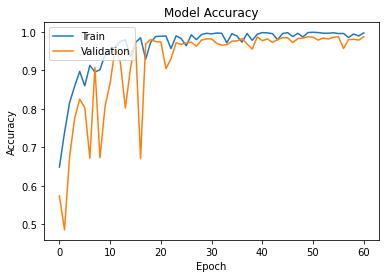

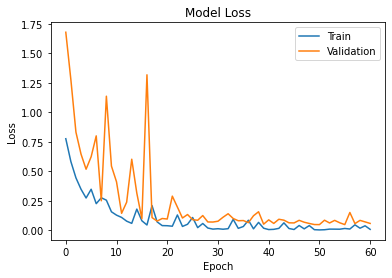

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the early stopping callback
early_stopping = EarlyStopping(patience=10)

# Define the model checkpoint callback
checkpoint_path = 'model_checkpoint.h5'
model_checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, save_weights_only=True)

# Train the model
history = model.fit(train_input, train_target, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


72/72 [==============================] - 25s 353ms/step


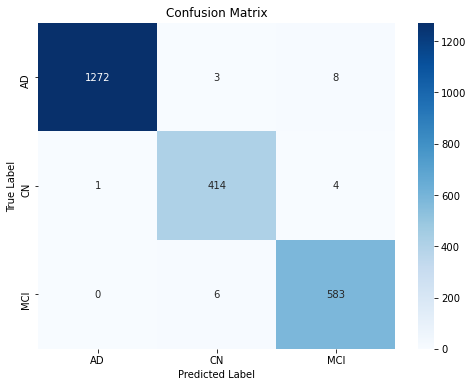

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
test_predictions = model.predict(test_input)
test_predictions = np.argmax(test_predictions, axis=1)
confusion_mat = confusion_matrix(test_target, test_predictions)
class_names = ['AD', 'CN', 'MCI']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()